**ESCUELA DE INGENIERÍA MECATRÓNICA**

## `PROCESAMIENTO DIGITAL DE SEÑALES E IMÁGENES`

### `Alumnos: `
  ### `- Romero Zavaleta, Joshep Andrés`
  ### `- Rodríguez Alva, Luís Fernando`
  ### `- Moreno Lozada, Sofía`

```
Laboratorio 03:OpenCV y Operaciones de Punto
```

# <font color=#FF0000>OpenCV</color>

* Mas de 2500 algoritmos optimizados

* C/C++, Python, Java y MATLAB, soporta Windows, Linux, Android y Mac OS

* Cuda y OpenCL (Actualmente en desarrollo)

# <font color=#FF0000>RESULTADOS ESPERADOS DE LA EXPERIENCIA</color>

## a) Implementa una función con la forma función de transformación para modificar una imagen arbitraria.

In [28]:
# Importamos las librerías:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### **Implementamos la función de transformación**

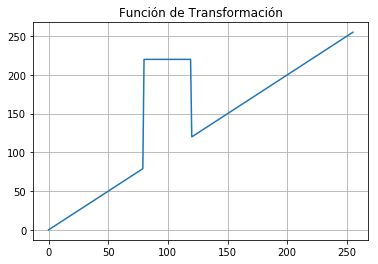

In [35]:
FT = np.zeros((256))

for i in range(256):
    if i < 80:
        FT[i]=(i-80)+80
    elif i>=80 and i<120:
        FT[i]=220
    elif i>=120:
        FT[i]=(i-120)+120


plt.plot(FT)
plt.title("Función de Transformación")
plt.grid(True)

### **Importamos la imagen con OpenCV**

In [30]:
imgSRC = '/8vo_CICLO/PDSeI/VIRTUAL/PRACTICAS/Imagenes/robotSofia.jpg'

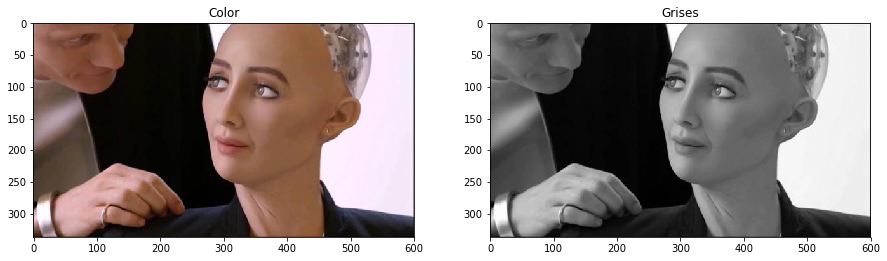

In [31]:
# Imagen a color:
plt.subplots(1, 3, figsize=(15,5))
img = cv2.imread(imgSRC)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(121)
plt.imshow(img)
plt.title("Color")

# Imagen en gris:
img_g = cv2.imread(imgSRC,0)
plt.subplot(122)
plt.imshow(img_g, cmap='gray')
plt.title("Grises")
plt.show()

### **Aplicamos la Transformación**

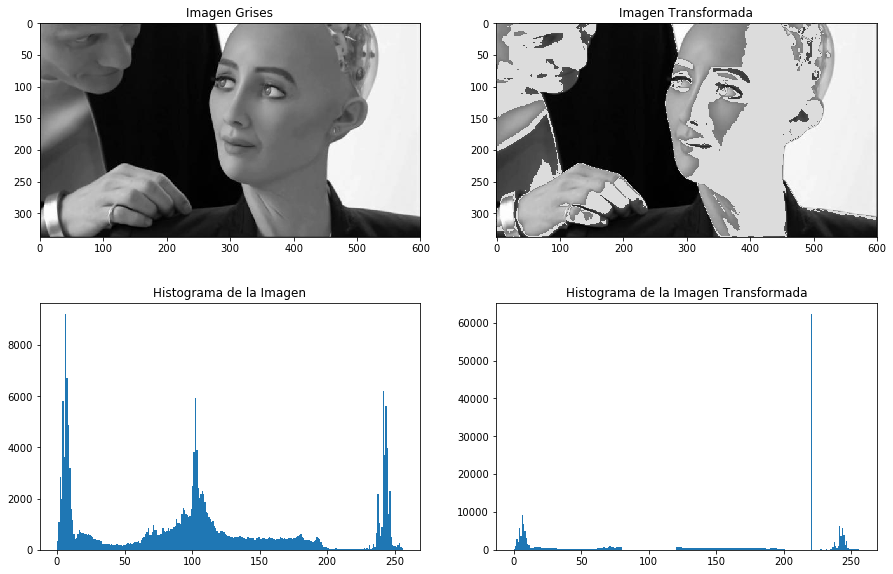

In [37]:
s = cv2.LUT(img_g,FT)

# Imprimimos:
plt.figure(figsize=(15,10))
plt.subplot(221); plt.imshow(img_g, cmap="gray"); plt.title("Imagen Grises")
plt.subplot(222); plt.imshow(s, cmap="gray"); plt.title("Imagen Transformada")
plt.subplot(223); plt.hist(img_g.ravel(),256, [0,256]); plt.title("Histograma de la Imagen")
plt.subplot(224); plt.hist(s.ravel(),256, [0,256]); plt.title("Histograma de la Imagen Transformada")
plt.show()

## b) Encripta un mensaje en dentro de una imagen usando descomposición en capas de bits. Al descomponer la imagen se debe apreciar el resultado.

In [38]:
# Importamos librerías:
import cv2
import matplotlib.pyplot as plt
import numpy as np

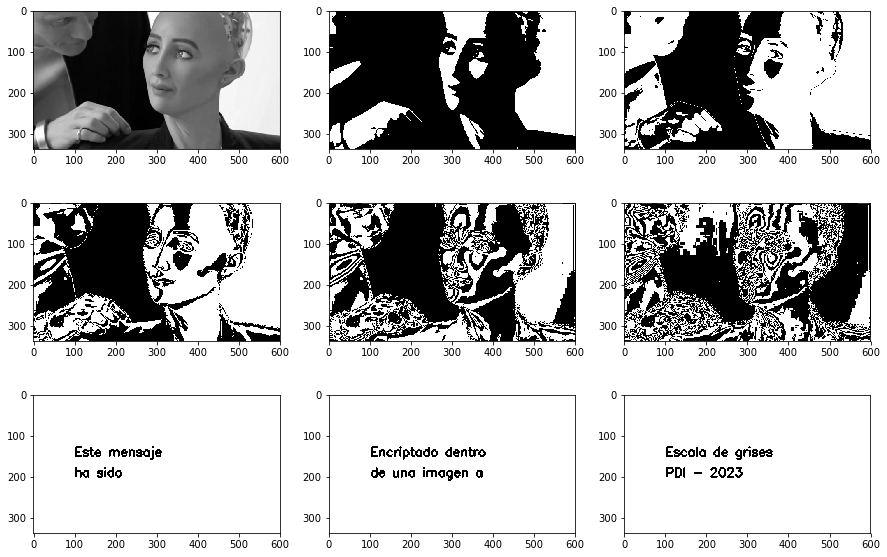

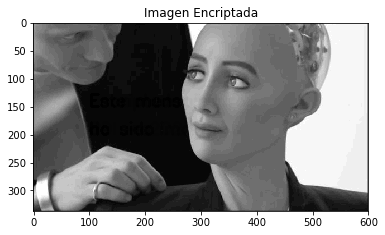

In [52]:
# Importamos la imagen en escala de grises:
img_g = cv2.imread(imgSRC,0)

#Creamos imagen blanca con las dimensiones de nuestra imagen:
img_w= np.ones((img_g.shape), dtype=np.uint8)*255

# La imagen en grises la descomponemos en 8 capas:
imgg_b7 = np.bitwise_and(img_g, 128)
imgg_b6 = np.bitwise_and(img_g, 64)
imgg_b5 = np.bitwise_and(img_g, 32)
imgg_b4 = np.bitwise_and(img_g, 16)
imgg_b3 = np.bitwise_and(img_g, 8)
imgg_b2 = np.bitwise_and(img_g, 4)
imgg_b1 = np.bitwise_and(img_g, 2)
imgg_b0 = np.bitwise_and(img_g, 1)

# La imagen blanca la descomponemos  en 8 capas:
imgw_b7 = np.bitwise_and(img_w, 128)
imgw_b6 = np.bitwise_and(img_w, 64)
imgw_b5 = np.bitwise_and(img_w, 32)
imgw_b4 = np.bitwise_and(img_w, 16)
imgw_b3 = np.bitwise_and(img_w, 8)
imgw_b2 = np.bitwise_and(img_w, 4)
imgw_b1 = np.bitwise_and(img_w, 2)
imgw_b0 = np.bitwise_and(img_w, 1)

# Escribimos el texto en las primeras 3 capas de la imagen blanca:
cv2.putText(imgw_b2, "Este mensaje", (100,150), cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,255),4)
cv2.putText(imgw_b2, "ha sido", (100,200), cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,255),4)
cv2.putText(imgw_b1, "Encriptado dentro", (100,150), cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,255),4)
cv2.putText(imgw_b1, "de una imagen a", (100,200), cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,255),4)
cv2.putText(imgw_b0, "Escala de grises", (100,150), cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,255),4)
cv2.putText(imgw_b0, "PDI - 2023", (100,200), cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,255),4)

# Intercambiamos las primeras 3 capas de la imagen con las de la imagen blanca:
imgg_b2 = imgw_b2
imgg_b1 = imgw_b1
imgg_b0 = imgw_b0

# Imprimimos todas las capas de la imagen
plt.figure(figsize=(15,10))
plt.subplot(331)
plt.imshow(img_g, cmap="gray")
plt.subplot(332)
plt.imshow(imgg_b7, cmap="gray")
plt.subplot(333)
plt.imshow(imgg_b6, cmap="gray")
plt.subplot(334)
plt.imshow(imgg_b5, cmap="gray")
plt.subplot(335)
plt.imshow(imgg_b4, cmap="gray")
plt.subplot(336)
plt.imshow(imgg_b3, cmap="gray")
plt.subplot(337)
plt.imshow(imgw_b2, cmap="gray")
plt.subplot(338)
plt.imshow(imgg_b1, cmap="gray")
plt.subplot(339)
plt.imshow(imgg_b0, cmap="gray")
plt.show()
plt.title("Imagen Encriptada")
plt.imshow(imgg_b7+imgg_b6+imgg_b5+imgg_b4+imgg_b3+imgg_b2+imgg_b1+imgg_b0, cmap="gray")
plt.show()

## c) Implementa el algoritmo de especificación de histograma de una imagen en escala de grises.

In [53]:
# Importamos las librerías:
import cv2
import matplotlib.pyplot as plt
import numpy as np

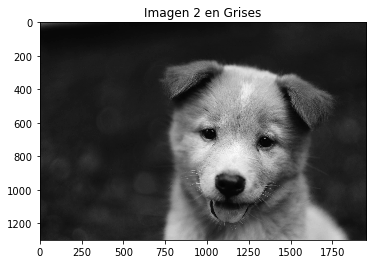

In [58]:
# Importamos la segunda imagen y la ponemos en grises:
imgSRC_2 = '/8vo_CICLO/PDSeI/VIRTUAL/PRACTICAS/Imagenes/puppy.jpg'
img_g2 = cv2.imread(imgSRC_2,0)
plt.imshow(img_g2, cmap='gray')
plt.title("Imagen 2 en Grises")
plt.show()

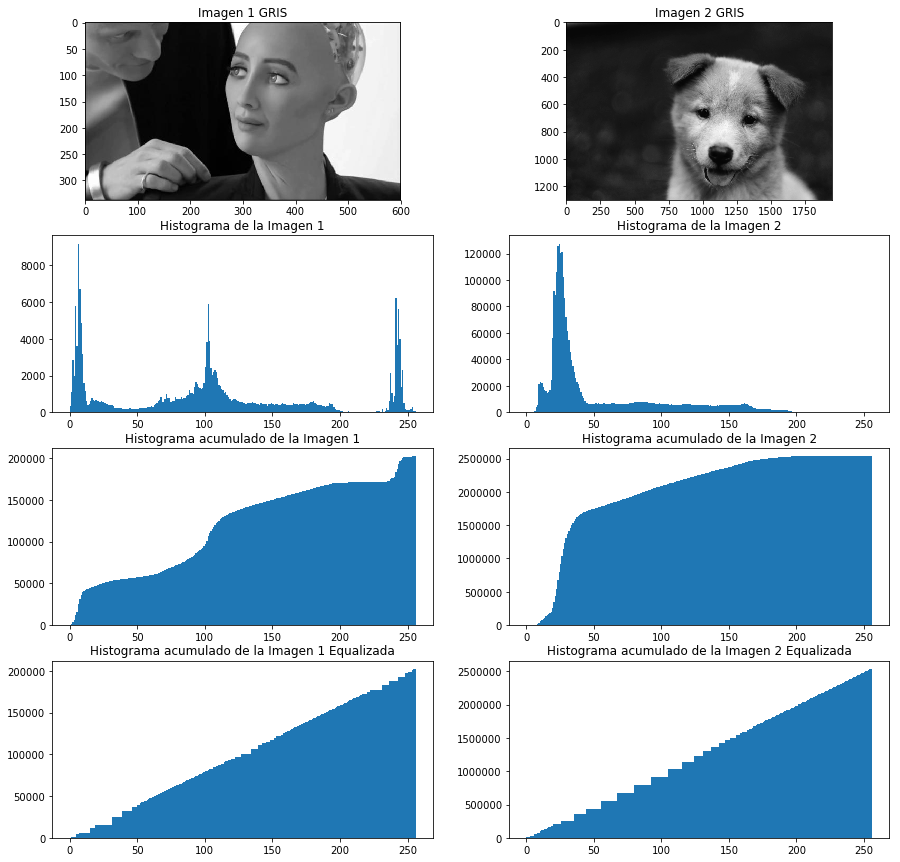

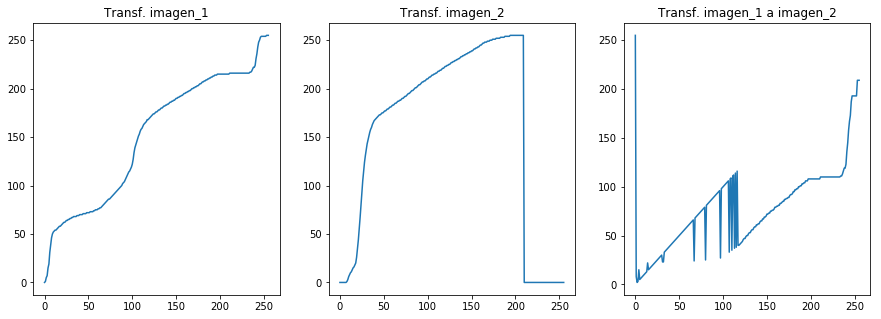

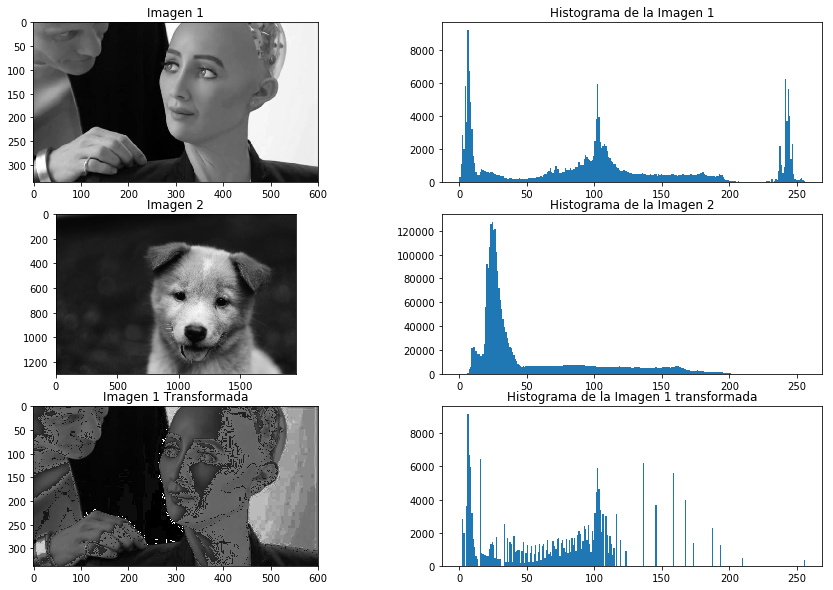

In [78]:
#Imágenes en escala de grises:
imagen_1 = img_g
imagen_2 = img_g2

#Obtengo las equalizaciones de las imágenes:
equ_imagen_1 = cv2.equalizeHist(imagen_1)
equ_imagen_2 = cv2.equalizeHist(imagen_2)

# Imprimimos las imágenes, sus histogramas y los histogramas acumulados de la imágenes y sus equalizaciones:

plt.figure(figsize=(15,15))
plt.subplot(421); plt.imshow(imagen_1, cmap="gray"); plt.title("Imagen 1 GRIS")
plt.subplot(422); plt.imshow(imagen_2, cmap="gray"); plt.title("Imagen 2 GRIS")
plt.subplot(423); plt.hist(imagen_1.ravel(),256, [0,256]); plt.title("Histograma de la Imagen 1")
plt.subplot(424); plt.hist(imagen_2.ravel(),256, [0,256]); plt.title("Histograma de la Imagen 2")
plt.subplot(425); plt.hist(imagen_1.ravel(),256, [0,256], cumulative=True);
plt.title("Histograma acumulado de la Imagen 1")
plt.subplot(426); plt.hist(imagen_2.ravel(),256, [0,256], cumulative=True);
plt.title("Histograma acumulado de la Imagen 2")
plt.subplot(427); plt.hist(equ_imagen_1.ravel(),256, [0,256], cumulative=True);
plt.title("Histograma acumulado de la Imagen 1 Equalizada")
plt.subplot(428); plt.hist(equ_imagen_2.ravel(),256, [0,256], cumulative=True);
plt.title("Histograma acumulado de la Imagen 2 Equalizada")
plt.show()

# Obtenemos la función que relaciona los colores de la imagen_1 y su Equalización:
    # Creamos el eje X:
F_x = list(range(256))
    # Creamos el vector que tendrá los valores del eje y:
F_y1 = np.zeros(256)
    
# Buscamos cada color de imagen_1 con su respectivo de Equalizacion 1 y los guardamos en F_y1:
for i in range(imagen_1.shape[0]):
    for j in range(imagen_1.shape[1]):
        F_y1[imagen_1[i,j]] = equ_imagen_1[i,j]
               
               
# Obtenemos la función que relaciona los colores de la imagen_2 y su Equalización:
    # Creamos el vector que tendrá los valores del eje y:
F_y2 = np.zeros(256)
               
# Buscamos cada color de imagen_2 con su respectivo de Equalizacion 2 y los guardamos en F_y2:
for i in range(imagen_2.shape[0]):
    for j in range(imagen_2.shape[1]):
        F_y2[imagen_2[i,j]] = equ_imagen_2[i,j]

# Obtenemos la función que relaciona los colores de la Imágen 1 y la Imágen 2:
    # Creamos el vector que tendrá los valores del eje y:
F_y3 = np.zeros(256)
               
# Rellenamos F_y3 con valores 0-256 para mantener valores de F_y1 que no tengan su par en F_y2:
for i in range(F_y1.shape[0]):
    F_y3[i] = i
               
    for i in range(F_y1.shape[0]):
        for j in range(F_y2.shape[0]):
               
            if F_y2[j] == F_y1[i]:
                F_y3[i] = j

# Graficamos las transformaciones de colores de la imagen_1 y imagen_2 a su respectiva Equalización:                
# Luego graficamos la transformación de los colores de imagen_1 a imagen_2:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(F_x,F_y1)
plt.title("Transf. imagen_1")

plt.subplot(132)
plt.plot(F_x,F_y2)
plt.title("Transf. imagen_2")

plt.subplot(133)
plt.plot(F_x,F_y3)
plt.title("Transf. imagen_1 a imagen_2")
plt.show()
               
# Aplicamos la transformación F_y3 a nuestra imagen:
imagen_gray_T= cv2.LUT(imagen_1, F_y3)
               
#Imprimimos la Imagen 1, Imágen 2 e Imagen 1 transformada con sus histogramas:
plt.figure(figsize=(15,10))
plt.subplot(321); plt.imshow(imagen_1, cmap="gray"); plt.title("Imagen 1") 
plt.subplot(322); plt.hist(imagen_1.ravel(),256, [0,256]); plt.title("Histograma de la Imagen 1")
plt.subplot(323); plt.imshow(imagen_2, cmap="gray"); plt.title("Imagen 2")
plt.subplot(324); plt.hist(imagen_2.ravel(),256, [0,256]); plt.title("Histograma de la Imagen 2")
plt.subplot(325); plt.imshow(imagen_gray_T, cmap="gray"); plt.title("Imagen 1 Transformada")
plt.subplot(326); plt.hist(imagen_gray_T.ravel(),256, [0,256]); plt.title("Histograma de la Imagen 1 transformada")
plt.show()

# <font color=#FF0000>TEST DE COMPROBACIÓN</color>
  

## a) Averigüe como crear un histograma en 2d con OpenCV.

Se crea utilizando la función cv2.calcHist(). Para los histogramas de color, necesitamos convertir la imagen de BGR a HSV (Recuerde, para el histograma 1D, convertimos de BGR a escala de grises). Para los histogramas 2D, sus parámetros se modificarán de la siguiente manera:

* channels = [0,1] porque necesitamos procesar el plano H y S.
* bin = [180,256] 180 para el plano H y 256 para el plano S.
* range = [0,180,0,256] El valor del tono se encuentra entre 0 y 180 y la saturación se encuentra entre 0 y 256.

Ejemplo de como quedaría:

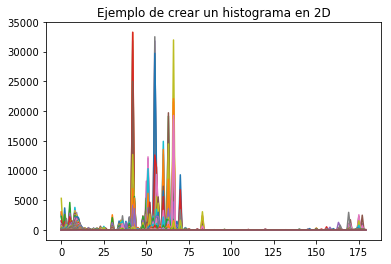

In [173]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
 
img = cv2.imread('/8vo_CICLO/PDSeI/VIRTUAL/PRACTICAS/Imagenes/puppy.jpg')
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
 
hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
plt.plot(hist)
plt.title("Ejemplo de crear un histograma en 2D")
plt.show()

## b) Defina una función que ingresando un rango de entrada (ej. 100, 120), se cree una función para expandir ese rango, en todo el rango dinámico de 0 a 255.

Lo que permite el rango dinámico es una función en la que se juntan imágenes iguales con diferente tonalidad para poder arreglarla y esta nos de una nueva imagen con mejor calidad, mejor nitidez y mejor saturacion de color

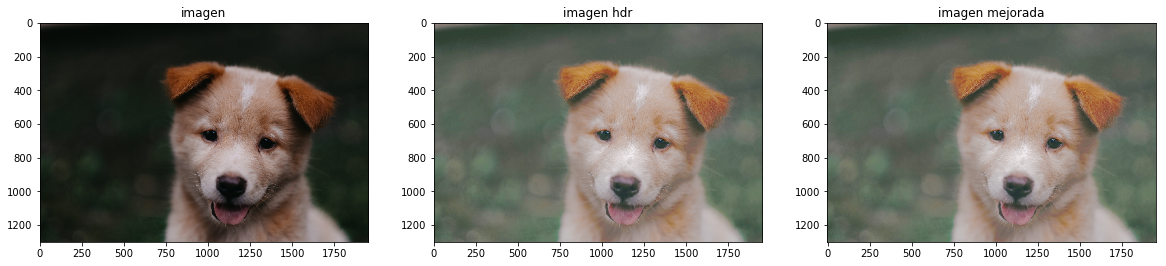

In [38]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img1 = cv2.cvtColor(cv2.imread("/8vo_CICLO/PDSeI/VIRTUAL/PRACTICAS/Imagenes/puppy.jpg"), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread("/8vo_CICLO/PDSeI/VIRTUAL/PRACTICAS/Imagenes/puppy_d.jpg"), cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(cv2.imread("/8vo_CICLO/PDSeI/VIRTUAL/PRACTICAS/Imagenes/puppy_e.jpg"), cv2.COLOR_BGR2RGB)

images = [img1, img2, img3]
times = np.array([1.0/4.,0.4,1.0], dtype=np.float32)
merger = cv2.createMergeDebevec()
hdr = merger.process(images, times)

tonemap = cv2.createTonemap(gamma=2.2)
tonemapped_image = tonemap.process(hdr)

res_debevec_8bit = np.clip(tonemapped_image*255, 0, 255).astype('uint8')

plt.figure(figsize=(20,10))
plt.subplot(131)
plt.imshow(img1)
plt.title("imagen")
plt.subplot(132)
plt.imshow(tonemapped_image)
plt.title("imagen hdr")
plt.subplot(133)
plt.imshow(res_debevec_8bit)
plt.title("imagen mejorada")
plt.show()


## c) Definir una función para aumentar o reducir el brillo de una imagen, según valor especificado.

La función más adecuada seria la gamma. Para aumentar el brillo, el valor especificado "intensidad" debe ser menor a 1, y mayor a 1 para disminuirlo.

Ejemplo:

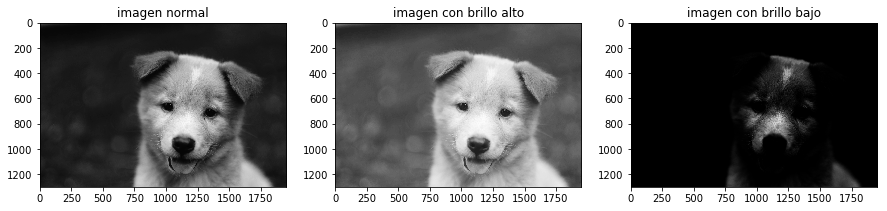

In [6]:
import cv2
import matplotlib.pyplot as plt

imgg = cv2.imread("/8vo_CICLO/PDSeI/VIRTUAL/PRACTICAS/Imagenes/puppy.jpg",0)/255

intensidad_alta = 0.4
brillo_alto=1*imgg**(intensidad_alta)

intensidad_baja = 5.5
brillo_bajo=1*imgg**(intensidad_baja)

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(imgg, cmap="gray")
plt.title("imagen normal")
plt.subplot(132)
plt.imshow(brillo_alto, cmap="gray")
plt.title("imagen con brillo alto")
plt.subplot(133)
plt.imshow(brillo_bajo, cmap="gray")
plt.title("imagen con brillo bajo")
plt.show()